In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest
import pandas.util.testing as tm

In [4]:
data = pd.read_csv (r'Sales_add.csv')

In [5]:
df = pd.DataFrame(data, columns= ['Month','Region','Manager','Sales_before_digital_add(in $)','Sales_After_digital_add(in $)'])
df

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [6]:
ARegion=df[df['Region'] == 'Region - A']
BRegion=df[df['Region'] == 'Region - B']
CRegion=df[df['Region'] == 'Region - C']
ARegion

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
5,Month-6,Region - A,Manager - B,137163,256948
7,Month-8,Region - A,Manager - A,131140,230637
11,Month-12,Region - A,Manager - A,178939,276279
13,Month-14,Region - A,Manager - A,151514,253131
15,Month-16,Region - A,Manager - B,177195,187305
16,Month-17,Region - A,Manager - C,140862,234908
19,Month-20,Region - A,Manager - B,152493,212579
21,Month-22,Region - A,Manager - C,130263,243020


[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21')]

<Figure size 432x288 with 0 Axes>

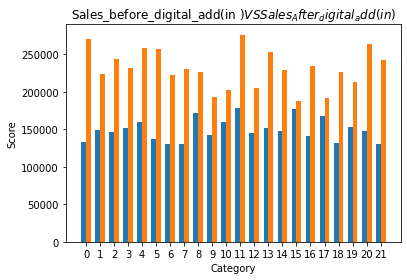

In [7]:
index = np.arange(int(len(df.index)))
bar_width = 0.35
plt.figure()
fig, ax = plt.subplots()
plt.bar(index,df['Sales_before_digital_add(in $)'], bar_width,label="Sales_before_digital_add(in $)")
plt.bar(index+bar_width,df['Sales_After_digital_add(in $)'],bar_width, label="Sales_After_digital_add(in $)")
plt.xlabel('Category')
plt.ylabel('Score')
plt.title('Sales_before_digital_add(in $) VS Sales_After_digital_add(in $)')
plt.xticks(index + bar_width / 2)
plt.rcParams['figure.figsize'] = [20, 20]
ax.set_xticklabels(index)

In [8]:
df['%increase'] = ((df['Sales_After_digital_add(in $)']-df['Sales_before_digital_add(in $)'])/df['Sales_before_digital_add(in $)'])*100
dfm= df['%increase'].mean()
print(dfm,'% increase in sale after digital add')

56.57850731561678 % increase in sale after digital add


In [9]:
from scipy.stats import linregress
linregress(df['Sales_before_digital_add(in $)'], df['Sales_After_digital_add(in $)'])

LinregressResult(slope=-0.3076102707466516, intercept=277031.47009667254, rvalue=-0.17866807113459016, pvalue=0.42629790889113306, stderr=0.3787860687722732)

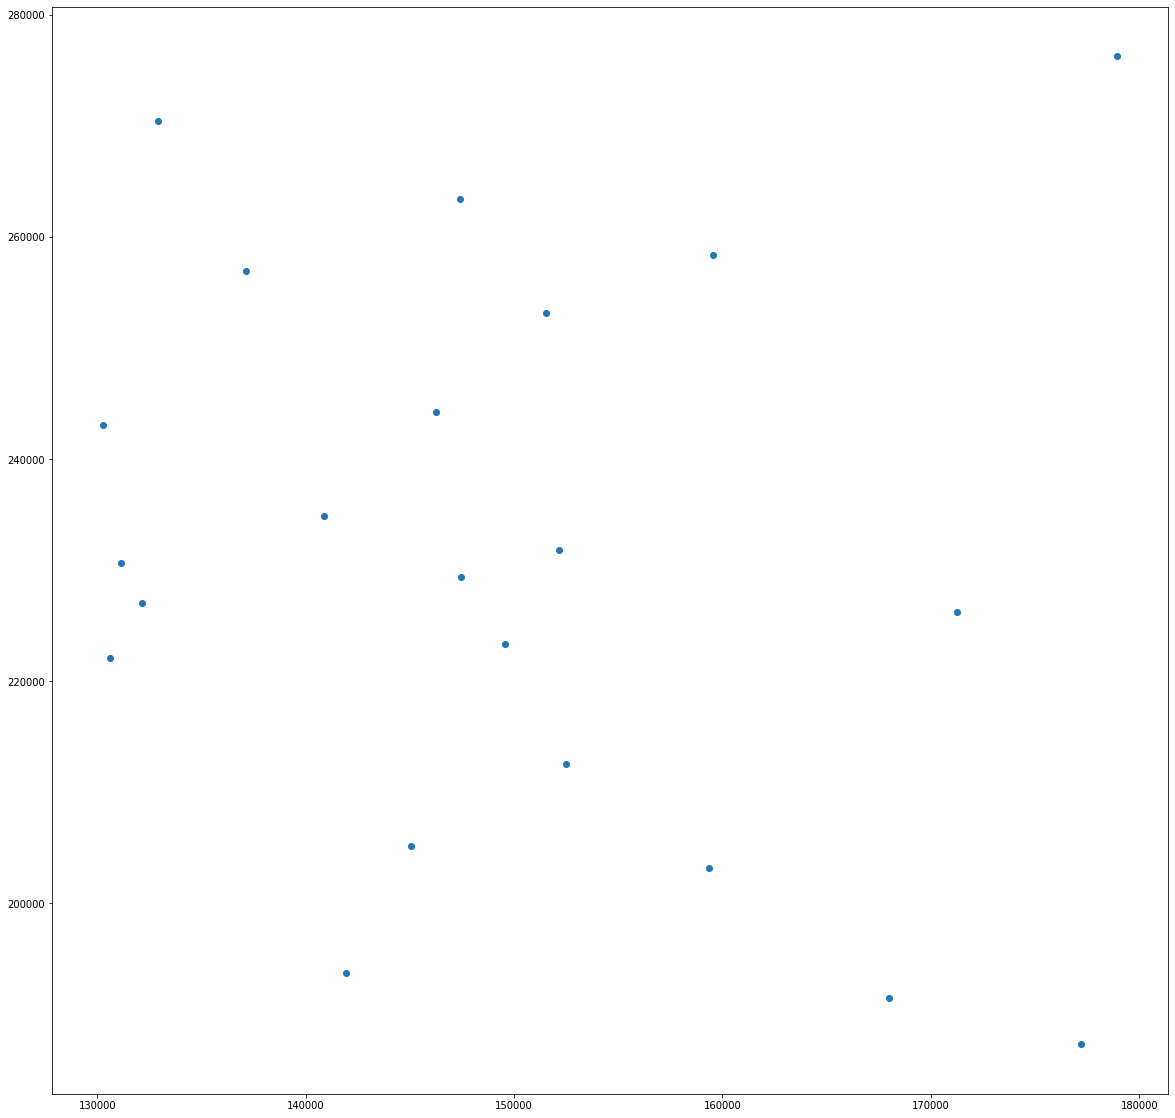

In [10]:
plt.scatter(df['Sales_before_digital_add(in $)'], df['Sales_After_digital_add(in $)'])
plt.show()

In [11]:
np.corrcoef(df['Sales_before_digital_add(in $)'], df['Sales_After_digital_add(in $)'])

array([[ 1.        , -0.17866807],
       [-0.17866807,  1.        ]])